#### ETL Test Worksheet

In [ ]:
import tweet_scraper
import language_finder
import tweet_cleaner
import keyword_tokenizer
import sent_transformer
import out_tagger
import tsi_builder
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Scrape Tweets

In [ ]:
df_raw = tweet_scraper.scrapeTweets()

#### Detect Language

In [ ]:
# reload last stage after bug crash
root = 'raw_data'
filename = 'raw_tweets_2019_6.pkl'
filestring = os.path.join(root, filename)
with open(filestring, 'rb') as filehandle:  
    # read the data as binary data stream
    df_raw = pickle.load(filehandle)

In [ ]:
df_lang = language_finder.detectLang(df_raw)

#### Clean Tweets

In [ ]:
# reload last stage after bug crash
root = 'proc_data'
filename = 'proc_lang_2019_6.pkl'
filestring = os.path.join(root, filename)
with open(filestring, 'rb') as filehandle:  
    # read the data as binary data stream
    df_lang = pickle.load(filehandle)

In [ ]:
df_clean = tweet_cleaner.cleanTweets(df_lang)

#### Tokenize Keywords

In [ ]:
# reload last stage after bug crash
root = 'proc_data'
filename = 'proc_clean_2019_6.pkl'
filestring = os.path.join(root, filename)
with open(filestring, 'rb') as filehandle:  
    # read the data as binary data stream
    df_clean = pickle.load(filehandle)

In [ ]:
df_tok = keyword_tokenizer.tokenKey(df_clean)

#### Transform Tweet to Sentiment

In [ ]:
df_sent = sent_transformer.tweetSent(df_tok)

In [ ]:
df_sent.head()

#### Tag Outliers

In [ ]:
# reload last stage after bug crash
root = 'proc_data'
filename = 'proc_sent_2019_6.pkl'
filestring = os.path.join(root, filename)
with open(filestring, 'rb') as filehandle:  
    # read the data as binary data stream
    df_sent = pickle.load(filehandle)

In [ ]:
df_tag = out_tagger.tagOkay(df_sent)

#### Build Indicator

In [ ]:
# reload last stage after bug crash
root = 'proc_data'
filename = 'proc_tag_2019_6.pkl'
filestring = os.path.join(root, filename)
with open(filestring, 'rb') as filehandle:  
    # read the data as binary data stream
    df_tag = pickle.load(filehandle)

In [ ]:
df_update = tsi_builder.loadInd(df_tag,'tsi002.csv')

In [ ]:
df_update['vad_compound'].plot(figsize=(15,6))
plt.show()

#### Run ETL

In [1]:
%run etl.py

Tweet Scraper Stage.
1/3 tweet scraper, loading files.
2/3 tweet scraper, scraping tweets.


0xProject 2019-6-01 2019-7-01
_jillruth 2019-6-01 2019-7-01
_jonasschnelli_ 2019-6-01 2019-7-01
aantonop 2019-6-01 2019-7-01
AaronvanW 2019-6-01 2019-7-01
adam3us 2019-6-01 2019-7-01
AdamDraper 2019-6-01 2019-7-01
adamludwin 2019-6-01 2019-7-01
alansilbert 2019-6-01 2019-7-01
albertwenger 2019-6-01 2019-7-01
AlenaSatoshi 2019-6-01 2019-7-01
alexbosworth 2019-6-01 2019-7-01
alexisohanian 2019-6-01 2019-7-01
alistairmilne 2019-6-01 2019-7-01
AlyseKilleen 2019-6-01 2019-7-01
AmberBaldet 2019-6-01 2019-7-01
APompliano 2019-6-01 2019-7-01
AriannaSimpson 2019-6-01 2019-7-01
AriDavidPaul 2019-6-01 2019-7-01
arjunblj 2019-6-01 2019-7-01
arrington 2019-6-01 2019-7-01
AugurProject 2019-6-01 2019-7-01
austinhill 2019-6-01 2019-7-01
Bakkt 2019-6-01 2019-7-01
balajis 2019-6-01 2019-7-01
barrysilbert 2019-6-01 2019-7-01
bendavenport 2019-6-01 2019-7-01
bhorowitz 2019-6-01 2019-7-01
billbarhydt 2019-6-01 2019-7-01
binance 2019-6-01 2019-7-01
Bitcoin 2019-6-01 2019-7-01
bitcoincoreorg 2019-6-01 2019-7


3/3 tweet_cleaner, process complete.
Keyword Tokenizer Stage.
1/4 keyword_tokenizer, initializing.
2/3 keyword_tokenizer, keyword tokenizing.



3/4 keyword_tokenizer, process complete.
Sentiment Transformer Stage.
1/3 sent_transformer, initializing.
2/3 sent_transformer, transforming tweets to sentiments.



3/3 sent_transformer, process complete.
Outlier Tagging Stage.
1/3 out_tagger, initializing.
2/3 out_tagger, tagging data.



3/3 out_tagger, process complete.
Indicator Build Stage.
1/3 tsi_builder, initializing.
2/3 tsi_builder, building indicator.
file created: tsi_{}_{}_{}.csv
3/3 tsi_builder, process complete.
ETL Process Complete.


#### Check Result

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

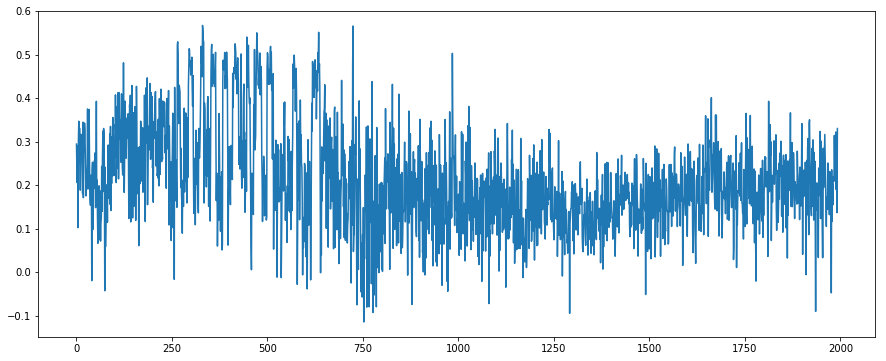

In [5]:
df_update = pd.read_csv('tsi_6_16_2019.csv')
df_update['vad_compound'].plot(figsize=(15,6))
plt.show()